In [6]:
import pyspeckit

Rest wavelengths of the lines we are fitting - use as initial guesses.

In [7]:
NIIa = 6549.86
NIIb = 6585.27
Halpha = 6564.614
SIIa = 6718.29
SIIb = 6732.68

Initialize spectrum object and plot region surrounding Halpha-[NII] complex.

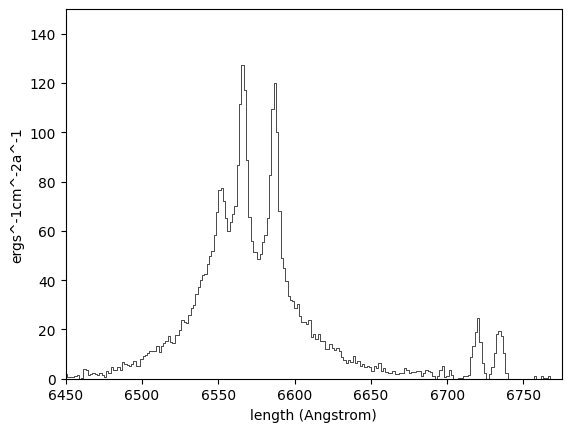

In [8]:
specfile = '/Users/kamiori/Desktop/Python/Research Project/OH Megamesa/line_fitting/sample_sdss.txt'
spec = pyspeckit.Spectrum(specfile, errorcol=2)
spec.plotter(xmin = 6450, xmax = 6775, ymin = 0, ymax = 150)

We fit the [NII] and [SII] doublets, and allow two components for Halpha.

The widths of all narrow lines are tied to the widths of [SII].

guesses: list or 'moments'

         A list of guesses. Guesses must have length = n * number of parameters in model. Guesses are 'required' for multifit fits (there is no automated guessing for most models)

Example:        

        for single-fit gaussian， guesses = [height, amplitude, center, width]

        for multi-fit gaussian, it is [amplitude, center, width].

You can also pass the keyword string 'moments' to have the moments be used to automatically determine the guesses for a "single" peak.

In [11]:
guesses = [50, NIIa, 5, 100, Halpha, 5, 50, Halpha, 50, 50, NIIb, 5, 20, SIIa, 5, 20, SIIb, 5]

tied = ['', '', 'p[17]', '', '', 'p[17]', '', 'p[4]', '', '3 * p[0]', '', 'p[17]', '', '', 
        'p[17]', '', '', '']


Actually do the fit.

In [12]:
spec.specfit(guesses = guesses, tied = tied, annotate = False)
spec.plotter.refresh()

Let's use the measurements class to derive information about the emission lines. 

The galaxy's redshift and the flux normalization of the spectrum must be supplied to convert measured fluxes to the line luminosities. 

If the spectrum we loaded in FITS format, 'BUNITS' would be read and we would not need to supply 'fluxnorm'.

In [13]:
spec.measure(z = 0.05, fluxnorm = 1e-17)

Now overplot positions of lines and annotate.

In [14]:
y = spec.plotter.ymax * 0.85  # Location of annotations in y

In [15]:
for i, line in enumerate(spec.measurements.lines.keys()):

    # If this line is not in our database of lines, don't try to annotate it 
    if line not in spec.speclines.optical.lines.keys(): continue

    x = spec.measurements.lines[line]['modelpars'][1] # Location of the emission line
    #Draw dashed line to mark fits position
    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin, spec.plotter.ymax], ls = '--', color = 'k')
    # Label it 
    spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], (x, y), 
                                rotation = 90, ha = 'right', va = 'center')
    

Make some nice axis labels.

In [16]:
spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux $(10^{-17}) \mathrm{erg/s/cm^2/\AA}$')


Text(38.347222222222214, 0.5, 'Flux $(10^{-17}) \\mathrm{erg/s/cm^2/\\AA}$')

Print out spectral line informatiion

In [17]:
print('Line Flux (erg/s/cm^2)   Amplitude (erg/s/cm^2)' 
        '   FWHM (Angstrom)     Luminosity (erg/s)')

for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line]['flux'],
            spec.measurements.lines[line]['amp'],
            spec.measurements.lines[line]['fwhm'],
            spec.measurements.lines[line]['lum'])

Line Flux (erg/s/cm^2)   Amplitude (erg/s/cm^2)   FWHM (Angstrom)     Luminosity (erg/s)
NIIa 1.5928079815562848e-15 2.4855953239467595e-16 6.020059586000299 9.383077606256747e+39
H_3-2 4.569871149599114e-15 7.131336916948627e-16 6.020059586000299 2.6920668494758547e+40
H_3-2_1 4.439595068392617e-14 5.420641198254855e-16 76.94147162741363 2.6153224713490443e+41
NIIb 4.778423944668854e-15 7.456785971840278e-16 6.020059586000299 2.814923281877024e+40
SIIa 1.4196357423539384e-15 2.215358036726378e-16 6.020059586000299 8.362936711371702e+39
SIIb 1.3266718022152287e-15 2.0702867302160536e-16 6.020059586000299 7.815295140632813e+39


Had we not supplied the objects redshift (or distance), the line luminosities would not have been measured, but integrated fluxes would still be derived.

 Also the measurements class separates the broad and narrow H-alpha components, and identifies which lines are which. How nice!

In [18]:
spec.specfit.plot_fit()

Save the figure.

In [19]:
spec.plotter.figure.savefig('sdss_fit_example.png')